## Задание 1
Ответьте на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью? Для ответа выполните следующие шаги:

- Постройте точечный график.
- Рассчитайте коэффициенты корреляции Пирсона и Спирмена.
- Постройте модель линейной регрессии.
- Рассчитайте коэффициент детерминации.
- Выведите график остатков.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
raw_df = pd.read_csv("water.csv")

In [3]:
raw_df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


<Axes: xlabel='hardness', ylabel='mortality'>

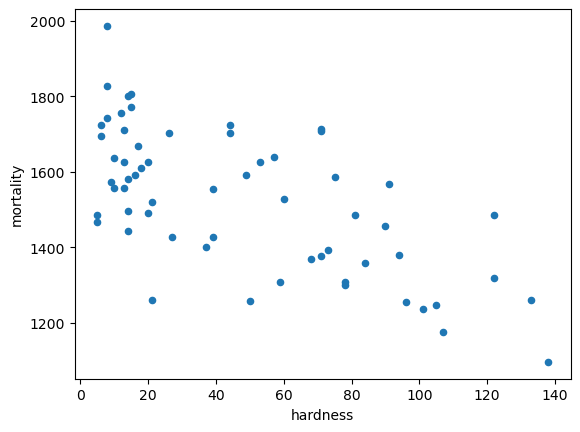

In [4]:
# визуализируем взаимосвязь преступности и цены дома
raw_df.plot(kind='scatter', x='hardness', y='mortality')

In [5]:
raw_df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [9]:
# считаем коэф. корреляции Спирмана
raw_df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
X = raw_df[['hardness']]
y = raw_df['mortality']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [16]:
model.coef_

array([-3.13167087])

In [17]:
model.intercept_

1668.9722977277095

In [18]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [19]:
y_test

0     1247
5     1558
46    1495
31    1702
13    1307
55    1625
34    1259
49    1587
12    1519
40    1696
33    1309
59    1485
16    1555
3     1800
53    1709
17    1428
8     1637
6     1807
41    1236
Name: mortality, dtype: int64

In [20]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

In [21]:
y_test

0     1247
5     1558
46    1495
31    1702
13    1307
55    1625
34    1259
49    1587
12    1519
40    1696
33    1309
59    1485
16    1555
3     1800
53    1709
17    1428
8     1637
6     1807
41    1236
Name: mortality, dtype: int64

In [24]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [25]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

In [26]:
X_const

,const,hardness
4,1.0,18
44,1.0,49
19,1.0,21
47,1.0,68
52,1.0,57
25,1.0,138
57,1.0,53
15,1.0,20
58,1.0,122
27,1.0,37


In [27]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           7.83e-06
Time:                        01:37:46   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [28]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1668.972298
hardness      -3.131671
dtype: float64
R2:  0.3967890100912279


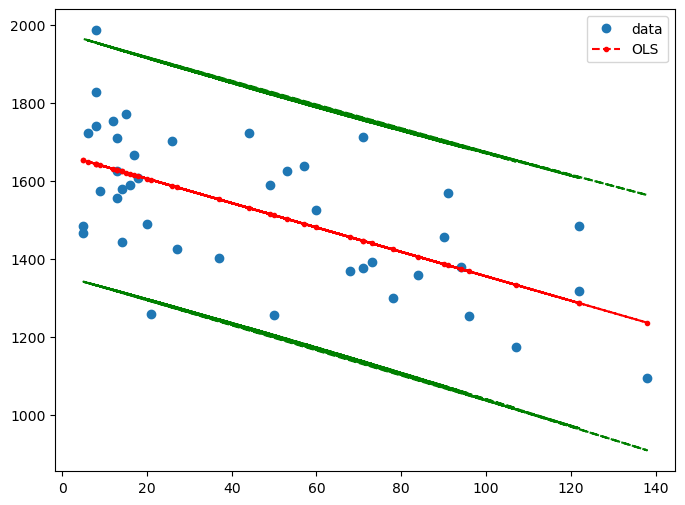

In [29]:
prstd, iv_l, iv_u = wls_prediction_std(results)
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

Text(0, 0.5, 'Остатки')

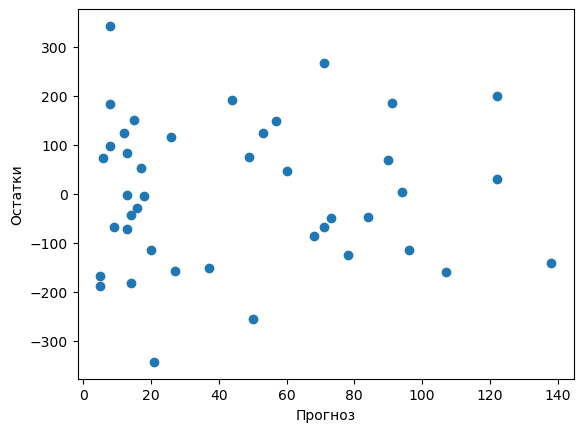

In [30]:
# посмотрим на остатки
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

## Задание 2
Ответьте на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности? Для ответ выполните следующие шаги:

- Разделите данные на 2 группы.
- Повторите аналогичные шаги из пункта 1 для каждой группы по отдельности.

In [31]:
raw_df1 = pd.read_csv("water.csv")

In [32]:
raw_df1.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [33]:
raw_df2 = raw_df1.loc[raw_df1['location'] == 'South']

In [34]:
raw_df2.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [35]:
raw_df3 = raw_df1.loc[raw_df1['location'] == 'North']

In [36]:
raw_df3.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


<Axes: xlabel='hardness', ylabel='mortality'>

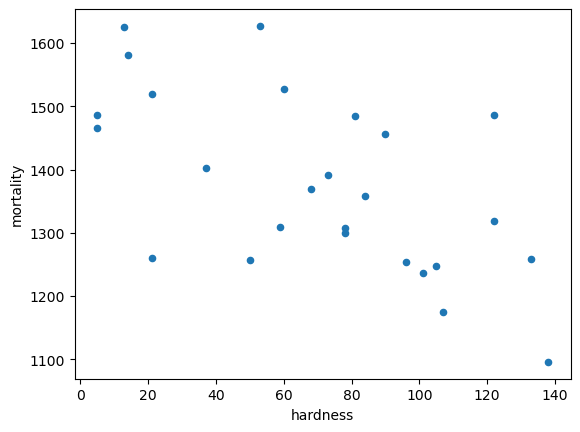

In [37]:
# визуализируем взаимосвязь преступности и цены дома
raw_df2.plot(kind='scatter', x='hardness', y='mortality')

In [38]:
raw_df2[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [39]:
# считаем коэф. корреляции Спирмана
raw_df2[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [41]:
X = raw_df2[['hardness']]
y = raw_df2['mortality']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [44]:
model.coef_

array([-3.51342921])

In [45]:
model.intercept_

1640.2204603423374

In [46]:
y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [47]:
y_test

18    1318
38    1486
0     1247
58    1486
27    1402
19    1260
33    1309
2     1466
Name: mortality, dtype: int64

In [48]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

-2.551922301235205

In [49]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

In [50]:
X_const

,const,hardness
57,1.0,53
12,1.0,21
7,1.0,78
32,1.0,14
37,1.0,107
9,1.0,84
10,1.0,73
54,1.0,13
39,1.0,90
56,1.0,60


In [51]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           7.30e-05
Time:                        01:53:05   Log-Likelihood:                -106.97
No. Observations:                  18   AIC:                             217.9
Df Residuals:                      16   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.2205     54.471     30.112      0.0

/Users/antonburakov/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [52]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1640.220460
hardness      -3.513429
dtype: float64
R2:  0.636380830887719


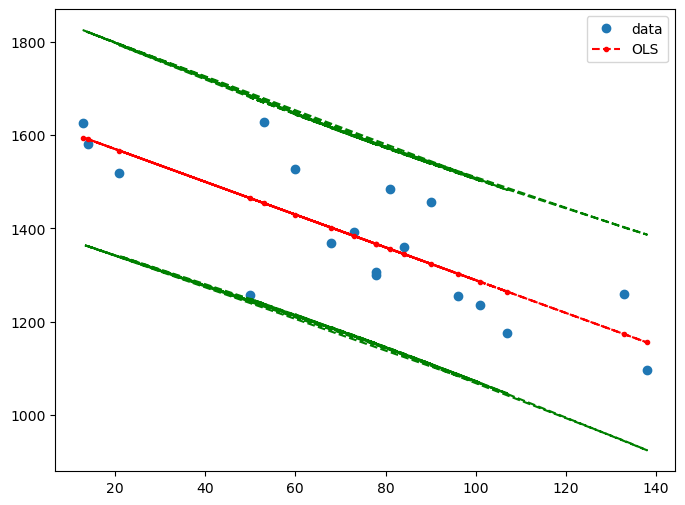

In [53]:
prstd, iv_l, iv_u = wls_prediction_std(results)
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

Text(0, 0.5, 'Остатки')

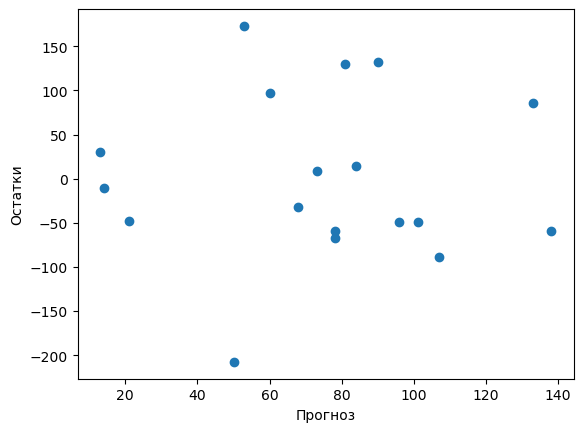

In [54]:
# посмотрим на остатки
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

<Axes: xlabel='hardness', ylabel='mortality'>

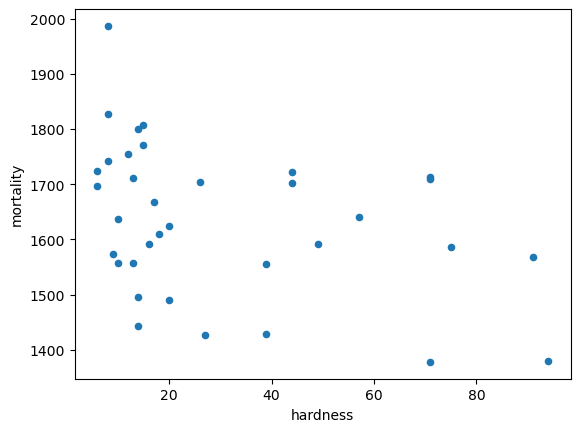

In [55]:
# визуализируем взаимосвязь преступности и цены дома
raw_df3.plot(kind='scatter', x='hardness', y='mortality')

In [56]:
raw_df3[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [57]:
# считаем коэф. корреляции Спирмана
raw_df3[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [59]:
X = raw_df3[['hardness']]
y = raw_df3['mortality']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [62]:
model.coef_

array([-1.97686226])

In [63]:
model.intercept_

1688.150229031281

In [64]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [65]:
y_test

45    1987
23    1574
43    1444
36    1724
26    1591
50    1713
31    1702
22    1742
16    1555
28    1772
17    1428
Name: mortality, dtype: int64

In [66]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.018885304285745863

In [67]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

In [68]:
X_const

,const,hardness
55,1.0,20
1,1.0,17
6,1.0,15
29,1.0,8
46,1.0,14
8,1.0,10
21,1.0,94
3,1.0,14
4,1.0,18
53,1.0,71


In [69]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Sat, 25 Nov 2023   Prob (F-statistic):             0.0316
Time:                        01:53:52   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37.137     45.457      0.0

In [70]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1688.150229
hardness      -1.976862
dtype: float64
R2:  0.19322282610033525


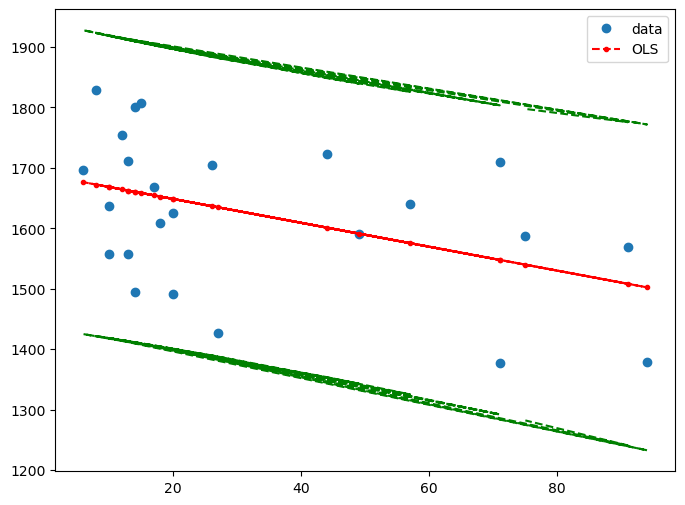

In [71]:
prstd, iv_l, iv_u = wls_prediction_std(results)
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

Text(0, 0.5, 'Остатки')

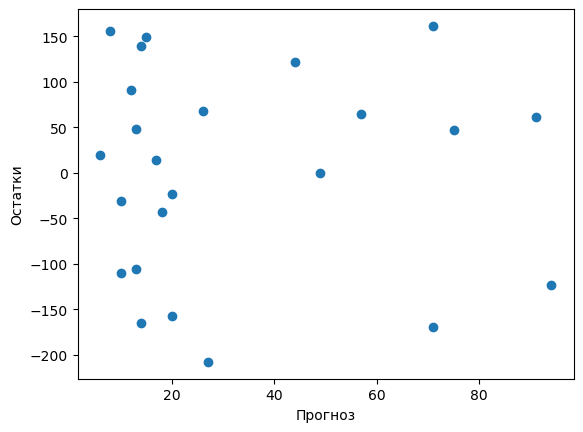

In [72]:
# посмотрим на остатки
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')